# Normality tests

The question that matters is not whether the data were sampled from an ideal Gaussian population, which is impossible by nature, but rather whether the **distribution from which they were sampled is close enough to the Gaussian ideal** that the results of the statistical tests are still usefull. Indeed, these tests are fairly robust to violations of the Gaussian assumption, especially if the sample sizes are large and equal.

## What a Gaussian distribution really looks like

The figure below shows the distribution of values randomly chosen from a Gaussian distribution, with the same mean and SD. The top graphs show samples with 12 values in each sample, and the bottom graphs show samples with 130 values. Because of random sampling, none of those distributions really looks completely bell shaped and symmetrical.

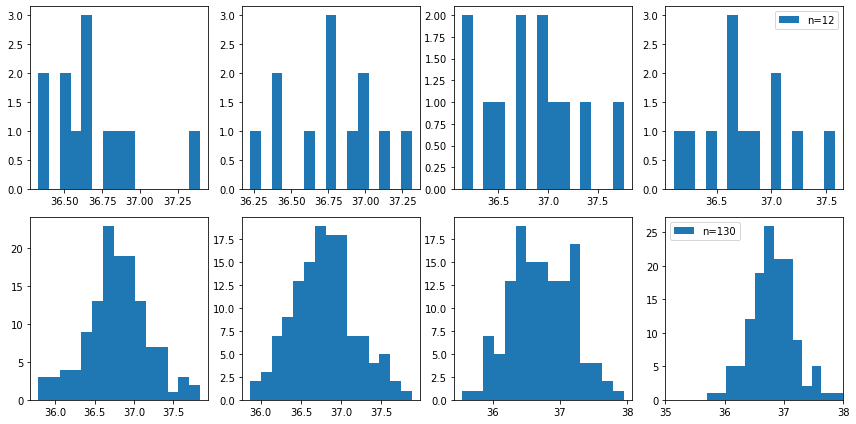

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

np.random.seed(111)

# set the mean and sdt temperature for random sampling
mean_temp = 36.8
std_temp = 0.4 

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,6))

for graph in range(4):
    axes[0,graph].hist(ss.norm(loc=mean_temp, scale=std_temp).rvs(size=12), label="n=12", bins=15)

for graph in range(4):
    axes[1,graph].hist(ss.norm(loc=mean_temp, scale=std_temp).rvs(size=130),label="n=130",bins=15)

axes[0,3].legend()
axes[1,3].legend()

plt.xlim((35,38))
plt.tight_layout()

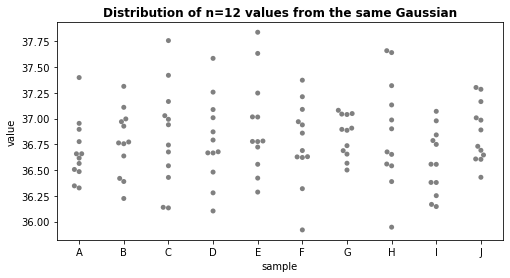

In [48]:
import pandas as pd
import seaborn as sns

np.random.seed(111)

distrib = pd.DataFrame(
   {label: ss.norm(loc=mean_temp, scale=std_temp).rvs(size=12) for label in 'ABCDEFGHIJ'}
)

plt.figure(figsize=(8,4))
sns.swarmplot(
    x=distrib.melt()['variable'],
    y=distrib.melt()['value'],
    color='grey'   
)

plt.xlabel("sample")
plt.title("Distribution of n=12 values from the same Gaussian", fontweight='bold');

## QQ plots

There exists several methods to test for normality and we recommend to combine a graphical method 
with a classic statistical test in order to get the best view of one's data.

You can get a graphical overview of the goodness-of-fit of a sample with a Quantile-Quantile-plot, or **QQplot**. 
The idea here is to compute a number of quantiles on your sample's values and plot them with the expected quantiles for the normal law.
**Samples drawn from a normal law will form a diagonal line.**

The Y axis plots the actual values in a sample of data, the X axis plots ideal predicted values assuming the data were sampled from a Gaussian distribution. First the program computes the percentil of each value in the data set. Next, for each percentile, it calculates how many SDs from the mean you need to go to reach that percentile on a Gaussian distribution. Finally, using the actual mean and SD computed from the data, it calculates the corresponding predicted value.

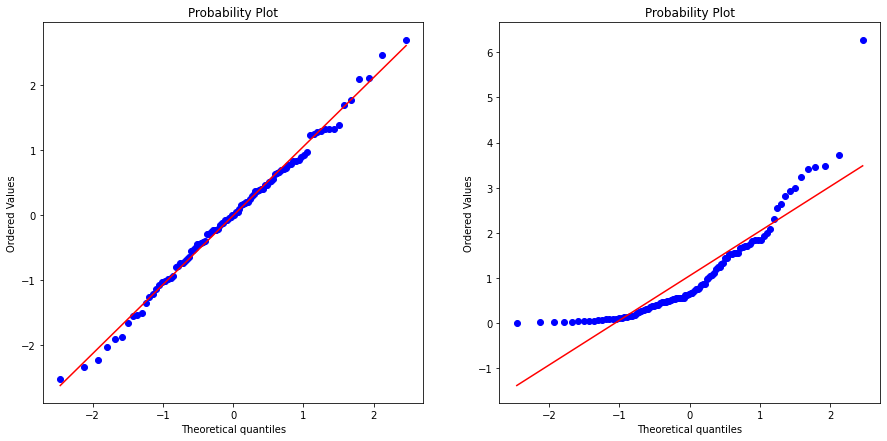

In [49]:
sampleN = np.random.normal(size = 100) #sample from a normal law
sampleE = np.random.exponential(size = 100) # sampling from another distribution

fig,axes = plt.subplots(1,2 , figsize = (15,7) )
junk = stats.probplot( sampleN , plot=axes[0] )
junk = stats.probplot( sampleE , plot=axes[1] )
# note : 
# * stats.probplot plots against the normal law by default, but that can be changed
# * the function returns theoretical and observed quantile, which are not interesting to us here.